In [ ]:
!pip install pandas openpyxl

In [4]:
!pip install pandas openpyxl

import pandas as pd

file_names = [
    'parsed_data.xlsx',
    'Технологии и медиа.xlsx',
    'авто_новости.xlsx',
    'бизнес.xlsx',
    'жилье.xlsx',
    'здоровье.xlsx',
    'финансы.xlsx',
    'экономика.xlsx'
]

dfs = []
for name in file_names:
    df = pd.read_excel(name)
    dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)

unique_df = combined_df.drop_duplicates()

if 'text' not in unique_df.columns:
    raise ValueError("Нет колонки 'text'. Проверь названия колонок!")

unique_df['text'] = unique_df['text'].fillna('').astype(str).str.strip()

unique_df['word_count'] = unique_df['text'].apply(lambda x: len(x.split()) if x else 0)

<ipython-input-4-4f41b54a5854>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_df['text'] = unique_df['text'].fillna('').astype(str).str.strip()
<ipython-input-4-4f41b54a5854>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_df['word_count'] = unique_df['text'].apply(lambda x: len(x.split()) if x else 0)


In [5]:
output_filename = 'final_dataset.xlsx'
unique_df.to_excel(output_filename, index=False)

from google.colab import files
files.download(output_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
categories_to_remove = ["Здоровье", "База знаний", "Экономика. Главное"]

filtered_df = unique_df[~unique_df['category'].isin(categories_to_remove)]

print(f'Количество строк после удаления: {len(filtered_df)}')

filtered_df.to_excel('filtered_dataset.xlsx', index=False)

from google.colab import files
files.download('filtered_dataset.xlsx')

Количество строк после удаления: 30151


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
politics_sample = filtered_df[filtered_df['category'] == "Политика"].head(4000)

other_categories = filtered_df[filtered_df['category'] != "Политика"]

final_df = pd.concat([politics_sample, other_categories], ignore_index=True)

print(f'Итоговое количество новостей: {len(final_df)}')

final_df.to_excel('final_dataset_limited_politics.xlsx', index=False)

Итоговое количество новостей: 26838


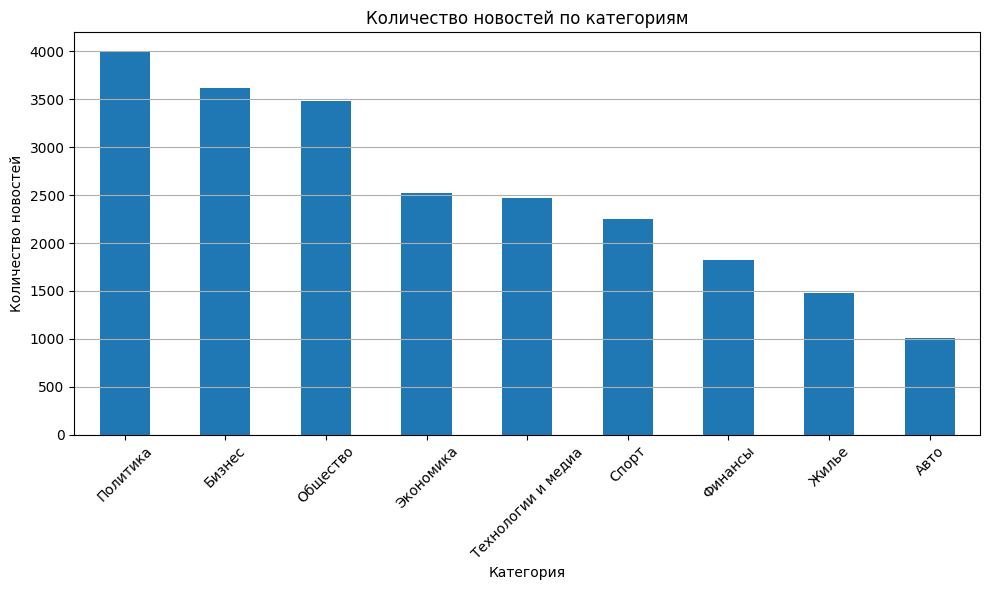

In [10]:
import matplotlib.pyplot as plt

if 'category' not in unique_df.columns:
    raise ValueError("В датафрейме нет колонки 'category'. Проверь название колонок!")

category_counts = final_df['category'].value_counts()

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Количество новостей по категориям')
plt.xlabel('Категория')
plt.ylabel('Количество новостей')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [1]:
!pip install pandas openpyxl

import pandas as pd

file_names = [
    'parsed_data_new.xlsx',
    'авто_2023.xlsx',
]

dfs = []
for name in file_names:
    df = pd.read_excel(name)
    dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)

unique_df = combined_df.drop_duplicates()

if 'text' not in unique_df.columns:
    raise ValueError("Нет колонки 'text'. Проверь названия колонок!")

unique_df['text'] = unique_df['text'].fillna('').astype(str).str.strip()

unique_df['word_count'] = unique_df['text'].apply(lambda x: len(x.split()) if x else 0)

In [2]:
output_filename = 'parsed_data_balanced.xlsx'
unique_df.to_excel(output_filename, index=False)

from google.colab import files
files.download(output_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

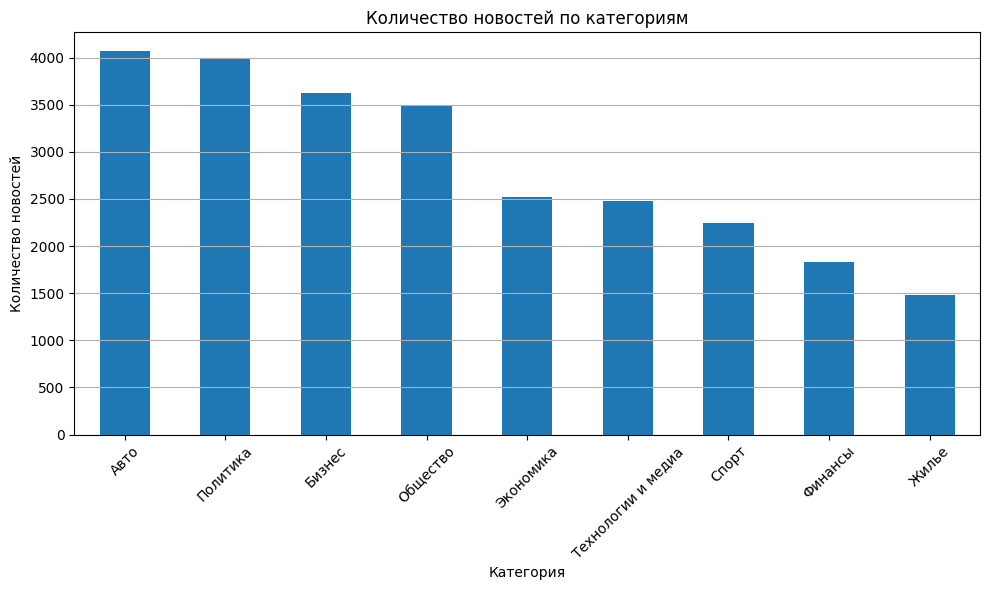

In [3]:
import matplotlib.pyplot as plt

if 'category' not in unique_df.columns:
    raise ValueError("В датафрейме нет колонки 'category'. Проверь название колонок!")

category_counts = unique_df['category'].value_counts()

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Количество новостей по категориям')
plt.xlabel('Категория')
plt.ylabel('Количество новостей')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [4]:
politics_sample = unique_df[unique_df['category'] == "Авто"].head(3500)

other_categories = unique_df[unique_df['category'] != "Авто"]

final_df = pd.concat([politics_sample, other_categories], ignore_index=True)

print(f'Итоговое количество новостей: {len(final_df)}')

final_df.to_excel('final_dataset_limited_авто.xlsx', index=False)

Итоговое количество новостей: 29334


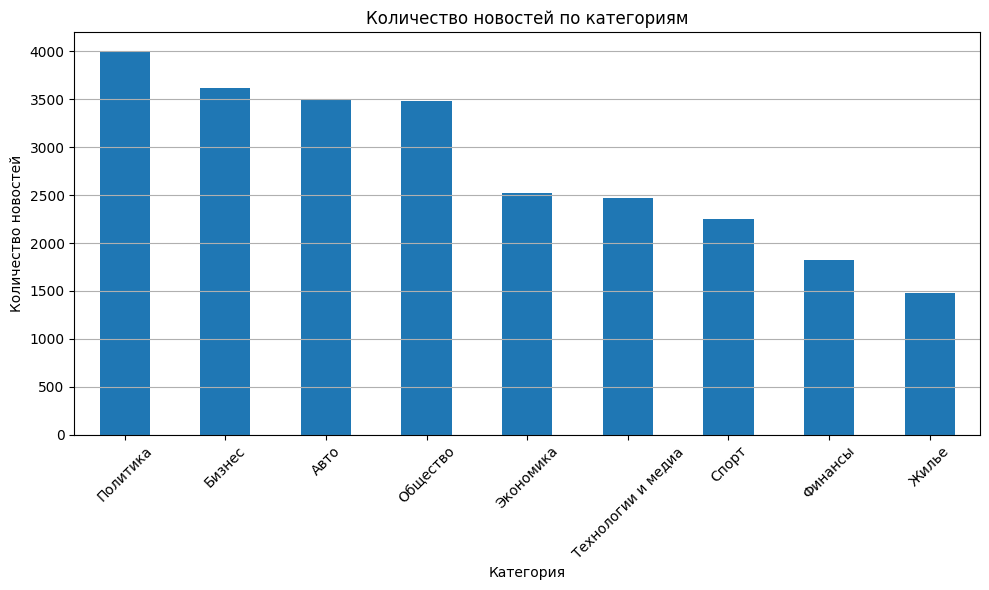

In [16]:
import matplotlib.pyplot as plt

if 'category' not in unique_df.columns:
    raise ValueError("В датафрейме нет колонки 'category'. Проверь название колонок!")

category_counts = final_df['category'].value_counts()

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Количество новостей по категориям')
plt.xlabel('Категория')
plt.ylabel('Количество новостей')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [15]:
final_df

,project,type,category,title,publish_date,fronturl,picture,overview,text,word_count
0,РБК,short_news,Авто,Глава АвтоВАЗа заявил о снижении продаж в феврале,2025-02-25T22:18:33+03:00,https://www.rbc.ru/rbcfreenews/67be10c59a79474...,1,NaN,В феврале 2025 года концерн АвтоВАЗ ожидает сн...,304
1,РБК,short_news,Авто,Юрист напомнил о штрафах за мытье машины на да...,2025-03-23T10:32:08+03:00,https://www.rbc.ru/rbcfreenews/67dfb71e9a79479...,1,NaN,Сотрудники ГИБДД могут оштрафовать автомобилис...,290
2,РБК,short_news,Авто,Минпромторг представил список облагаемых налог...,2025-03-29T19:43:30+03:00,https://www.rbc.ru/rbcfreenews/67e81d279a7947d...,1,В первый список внесены 303 модели средней сто...,Минпромторг России составил список дорогостоящ...,333
3,Autonews,short_news,Авто,В России стартовали продажи Volkswagen Golf. Н...,2025-01-06T22:51:30+03:00,https://www.autonews.ru/news/677bdc9b9a7947668...,1,NaN,В России возобновили продажи новых хэтчбеков V...,175
4,Autonews,short_news,Авто,В России назвали самые популярные пикапы. Цены...,2025-01-06T15:11:35+03:00,https://www.autonews.ru/news/677bc85d9a7947904...,1,NaN,"В России резко вырос спрос на пикапы. Так, по ...",403
...,...,...,...,...,...,...,...,...,...,...
29329,РБК,article,Экономика,"РЭЦ назвал ниши, где экспорт из России может п...",2025-04-25T00:00:14+03:00,https://www.rbc.ru/economics/25/04/2025/680743...,1,Производители из России могли бы активнее зани...,Российские экспортеры могут потеснить европейс...,1213
29330,РБК,article,Экономика,Трамп оценил последствия возможной рецессии в США,2025-05-03T14:51:31+03:00,https://www.rbc.ru/economics/03/05/2025/6815f9...,1,У США будет «сильнейшая экономика в истории ст...,Даже если в экономике США ненадолго наступит р...,357
29331,РБК,article,Экономика,"Минэк раскрыл, что ждет экономику России в бли...",2025-05-03T11:00:38+03:00,https://www.rbc.ru/economics/03/05/2025/681332...,1,NaN,"К 2028 году рост ВВП в России составит 3%, а с...",174
29332,РБК,article,Экономика,В каких отраслях в России больше всего сотрудн...,2025-05-02T04:57:56+03:00,https://www.rbc.ru/economics/02/05/2025/681106...,1,NaN,Число занятых в России сильнее всего выросло в...,206


In [7]:
final_df['picture'] = final_df['picture'].apply(lambda x: 1 if pd.notna(x) and str(x).strip() != '' else 0)

print(final_df['picture'].value_counts())

final_df.to_excel('final_dataset_with_picture_flag.xlsx', index=False)

picture
1    29108
0      226
Name: count, dtype: int64


In [14]:
columns_to_keep = [
    'project',
    'type',
    'category',
    'title',
    'publish_date',
    'fronturl',
    'picture',
    'overview',
    'text',
    'word_count'
]

print("Колонки в датафрейме:", final_df.columns.tolist())

if 'project_nick' in final_df.columns and 'project_nik' not in final_df.columns:
    final_df = final_df.rename(columns={'project_nick': 'project_nik'})

final_df = final_df[columns_to_keep]

print("Финальные колонки:", final_df.columns.tolist())

final_df.to_excel('final_dataset_selected_columns.xlsx', index=False)

Колонки в датафрейме: ['project', 'project_nik', 'type', 'category', 'title', 'publish_date', 'fronturl', 'picture', 'overview', 'text', 'word_count']
Финальные колонки: ['project', 'type', 'category', 'title', 'publish_date', 'fronturl', 'picture', 'overview', 'text', 'word_count']


In [13]:
unique_projects = final_df['project_nik'].unique()

print("Уникальные значения в колонке project_nik:")
for value in unique_projects:
    print(value)

Уникальные значения в колонке project_nik:
rbcnews
autonews
nan
realty
